In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplt_style_n

plt.style.use(mplt_style_n.style1)

In [2]:
import WaterQualityFunction as wqf

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
df = pd.read_csv('govdat.csv', low_memory=False)

From the report...

Nutrient data, of four different sample point types, has been extracted from the Environment
Agency’s water quality archive (WIMS):

- Freshwater (Used to calculate DAIN and DAIP loads into the estuary).

- STWs/Trade Discharges (Used to calculate DAIN and DAIP loads into the estuary).

- Solent Background (Used to provide background concentrations of N, P and Chl).

- Estuary (Used to provide mean/median values for the estuary that the model is calibrated against).


Legend:

green squares freshwater

blue dots eastuary validation sites

pink triangle sewage discharges

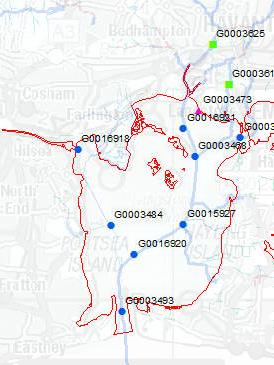

Freshwater (green squares)

G0003616 - R Lavant at IBM Havant

G0003625 - Hermitage Stream – New Road

Estuarine (blue circles)


- G0016918 A2030 Bridge, Langstone

- G0015927 Alpha Buoy Langstone

- G0003493 Langstone Harbour Mouth

- G0016920 Nw Sinah Buoy, Langstone

- G0003467 Langstone Bridge



- G0003468 Langstone Chan Southmoor Point


- G0016921 Entrance to Chldock Lake

- G0003484 Broom Channel Great Salterns




## loc_subset: to construct the report dataset

In [5]:
list_loc_langstone_estuary = ["G0003493", "G0016920","G0003484","G0016918","G0015927","G0003468","G0003467","G0016921"]

In [6]:
list_loc_langstone_freshwater = ["G0003616", "G0003625"]


In [7]:
list_loc_langstone_bkg = ["G0003368", "G0003508","G0003484","G0016873","Y0003370"]

In [8]:
df_langstone_G0003368 = wqf.loc_subset(df, list_loc_langstone_bkg[0], location_type = "notation")
df_langstone_G0003508 = wqf.loc_subset(df, list_loc_langstone_bkg[1], location_type = "notation")
df_langstone_G0003484 = wqf.loc_subset(df, list_loc_langstone_bkg[2], location_type = "notation")
df_langstone_G0016873 = wqf.loc_subset(df, list_loc_langstone_bkg[3], location_type = "notation")
df_langstone_Y0003370 = wqf.loc_subset(df, list_loc_langstone_bkg[4], location_type = "notation")


In [9]:
df_langstone_G0003493 = wqf.loc_subset(df, list_loc_langstone_estuary[0], location_type = "notation")
df_langstone_G0016920 = wqf.loc_subset(df, list_loc_langstone_estuary[1], location_type = "notation")
df_langstone_G0003484 = wqf.loc_subset(df, list_loc_langstone_estuary[2], location_type = "notation")
df_langstone_G0016918 = wqf.loc_subset(df, list_loc_langstone_estuary[3], location_type = "notation")
df_langstone_G0015927 = wqf.loc_subset(df, list_loc_langstone_estuary[4], location_type = "notation")
df_langstone_G0003468 = wqf.loc_subset(df, list_loc_langstone_estuary[5], location_type = "notation")
df_langstone_G0003467 = wqf.loc_subset(df, list_loc_langstone_estuary[6], location_type = "notation")
df_langstone_G0016921 = wqf.loc_subset(df, list_loc_langstone_estuary[7], location_type = "notation")


In [10]:
df_report_estuary = pd.concat([df_langstone_G0003493,df_langstone_G0016920, df_langstone_G0003484, df_langstone_G0016918, \
                      df_langstone_G0015927, df_langstone_G0003468, df_langstone_G0003467, df_langstone_G0016921])

In [11]:
df_langstone_G0003616 = wqf.loc_subset(df, list_loc_langstone_freshwater[0], location_type = "notation")
df_langstone_G0003625 = wqf.loc_subset(df, list_loc_langstone_freshwater[1], location_type = "notation")


In [12]:
df_report_freshwater = pd.concat([df_langstone_G0003616,df_langstone_G0003625])

In [13]:
df_langstone_buddsfarm = wqf.loc_subset(df, "G0003473", location_type = "notation")


In [14]:
df_langstone_report = pd.concat([df_langstone_buddsfarm,df_report_freshwater, df_report_estuary])

## plot_location_nutrientVStime:  111 for freshwater, estuary, sewage discharge

Nutrient data were retrieved from the Environment Agency’s water quality archive (WIMS) for the following determinands:

- 0111 Ammonia (N), mg/l

- 0116 N Oxidised, mg/l

- 0117 Nitrate (N), mg/l

- 0118 Nitrite (N), mg/l

- 0180 Orthophospht, mg/l

- 9856 OrthophsFilt, mg/l

- 9942 N Oxid Filt, mg/l

- 9993 NH3 filt N, mg/l

In [15]:
plot_params_fw = {'linewidth': 1.5, 'c': 'grey', 'linestyle':'--'}
scatter_params_fw = {'facecolor':'green','edgecolor':'#458B74', 'marker':'o', 's':40, 'alpha':0.3}

In [16]:
plot_params_es = {'linewidth': 1.5, 'c': '#00688B', 'linestyle':'-', 'alpha':0.8}
scatter_params_es = {'facecolor':'#00008B','edgecolor':'#00008B', 'marker':'s', 's':35, 'alpha':0.3}

In [17]:
plot_params_sew = {'linewidth': 1.5, 'c': '#FFC1C1', 'linestyle':':'}
scatter_params_sew = {'facecolor':'#8B2252','edgecolor':'#8B2252', 'marker':'^', 's':50, 'alpha':0.4}

Text(0.5, 1.0, 'Sewage discharges - Budds Farm')

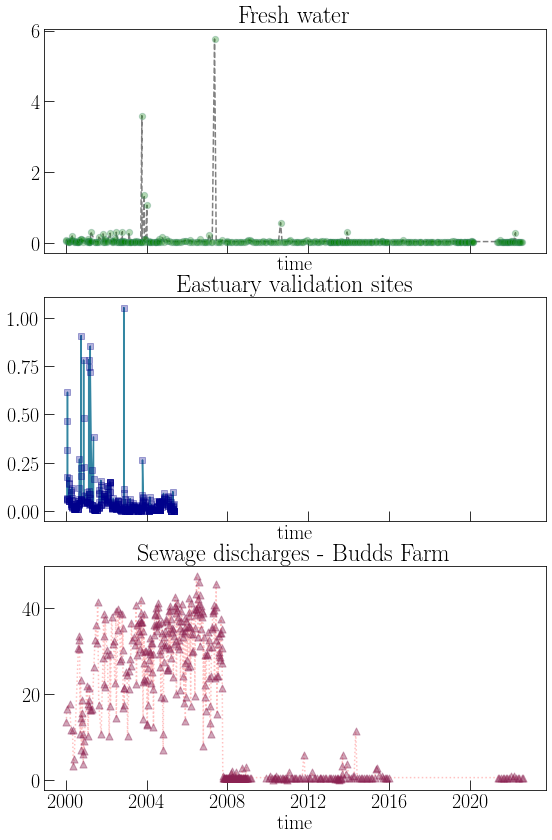

In [18]:
fig, axes = plt.subplots(nrows=3,ncols=1, sharex=True, figsize=(9, 14))


wqf.plot_location_nutrientVStime_customizable(df_report_freshwater, "", 111, ax=axes[0], seasons=False, plt_kwargs=plot_params_fw, sct_kwargs=scatter_params_fw );
axes[0].set_title("Fresh water")


wqf.plot_location_nutrientVStime_customizable(df_report_estuary, "", 111, ax=axes[1], seasons=False, plt_kwargs=plot_params_es, sct_kwargs=scatter_params_es );
axes[1].set_title("Eastuary validation sites")



wqf.plot_location_nutrientVStime_customizable(df_langstone_buddsfarm, "", 111, ax=axes[2], seasons=False, plt_kwargs=plot_params_sew, sct_kwargs=scatter_params_sew );
axes[2].set_title("Sewage discharges - Budds Farm")

# Plots from the report

We can see seasonal changes dividing the dataset in summer (April to
September) and winter (October to March).

In [19]:
plot_params_3616 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_3616 = {'c':'#EE6A50', 'marker':'+', 's':35, 'alpha':0.85}

plot_params_3625 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_3625 = {'c':'#48D1CC', 'marker':'.', 's':40, 'alpha':0.85}


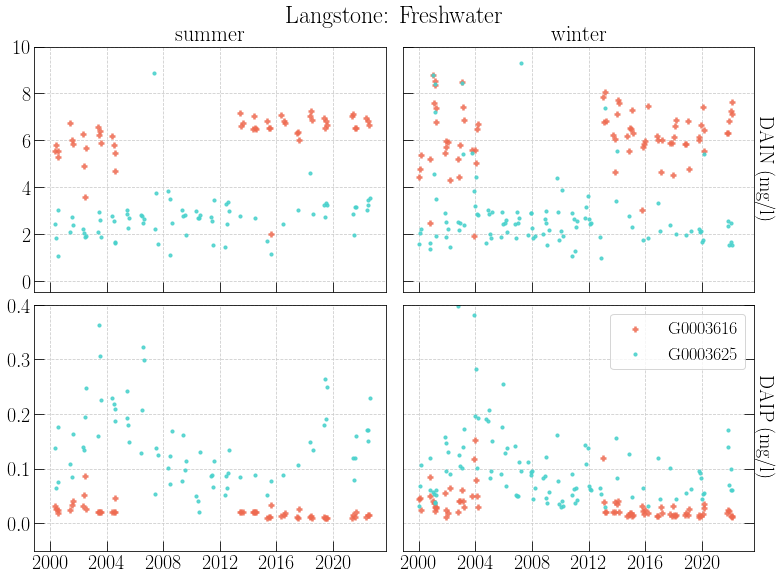

In [30]:
fig, axes = plt.subplots(nrows=2,ncols=2, sharey='row', sharex=True, figsize=(10,7))
#fig.subplots_adjust(hspace=0.)

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)


wqf.DAIN_summer(df_langstone_G0003616, "", location_type="notation", plt_kwargs_s=plot_params_3616,\
        sct_kwargs_s=scatter_params_3616,ax=axes[0, 0])

wqf.DAIN_summer(df_langstone_G0003625, "", location_type="notation", plt_kwargs_s=plot_params_3625,\
        sct_kwargs_s=scatter_params_3625,ax=axes[0, 0], plot_title="summer")

wqf.DAIN_winter(df_langstone_G0003616, "", location_type="notation", plt_kwargs_w=plot_params_3616,\
        sct_kwargs_w=scatter_params_3616,ax=axes[0, 1])

wqf.DAIN_winter(df_langstone_G0003625,"", location_type="notation", plt_kwargs_w=plot_params_3625,\
                sct_kwargs_w=scatter_params_3625,ax=axes[0, 1], plot_title="winter")

axes[0, 1].yaxis.set_label_position("right")

axes[0, 1].set_ylabel("DAIN (mg/l)", rotation=270, labelpad=20)

axes[0, 1].set_ylim([-.5, 10])
axes[0, 0].set_ylim([-.5, 10])



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003616, "", 180, ax=axes[1, 0],  location_type="notation", plt_kwargs_s=plot_params_3616, sct_kwargs_s=scatter_params_3616);
wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003625, "", 180, ax=axes[1, 0], location_type="notation", plt_kwargs_s=plot_params_3625, sct_kwargs_s=scatter_params_3625);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003616, "", 180, ax=axes[1, 1],  location_type="notation", plt_kwargs_w=plot_params_3616, sct_kwargs_w=scatter_params_3616, label_str="G0003616");
wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003625, "", 180, ax=axes[1, 1], location_type="notation", plt_kwargs_w=plot_params_3625, sct_kwargs_w=scatter_params_3625, label_str="G0003625");
axes[1, 1].yaxis.tick_right()

axes[1, 1].yaxis.set_label_position("right")

axes[1, 1].set_ylabel("DAIP (mg/l)", rotation=270, labelpad=20)

axes[1, 0].set_ylim([-.05, 0.4])
axes[1, 1].set_ylim([-.05, 0.4])

axes[0, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 1].grid(which='major', color='#CCCCCC', linestyle='--')
fig.suptitle(x=0.5, y=1.08, t="Langstone: Freshwater", fontsize=24);

### Figure 3 in report:

<div>
   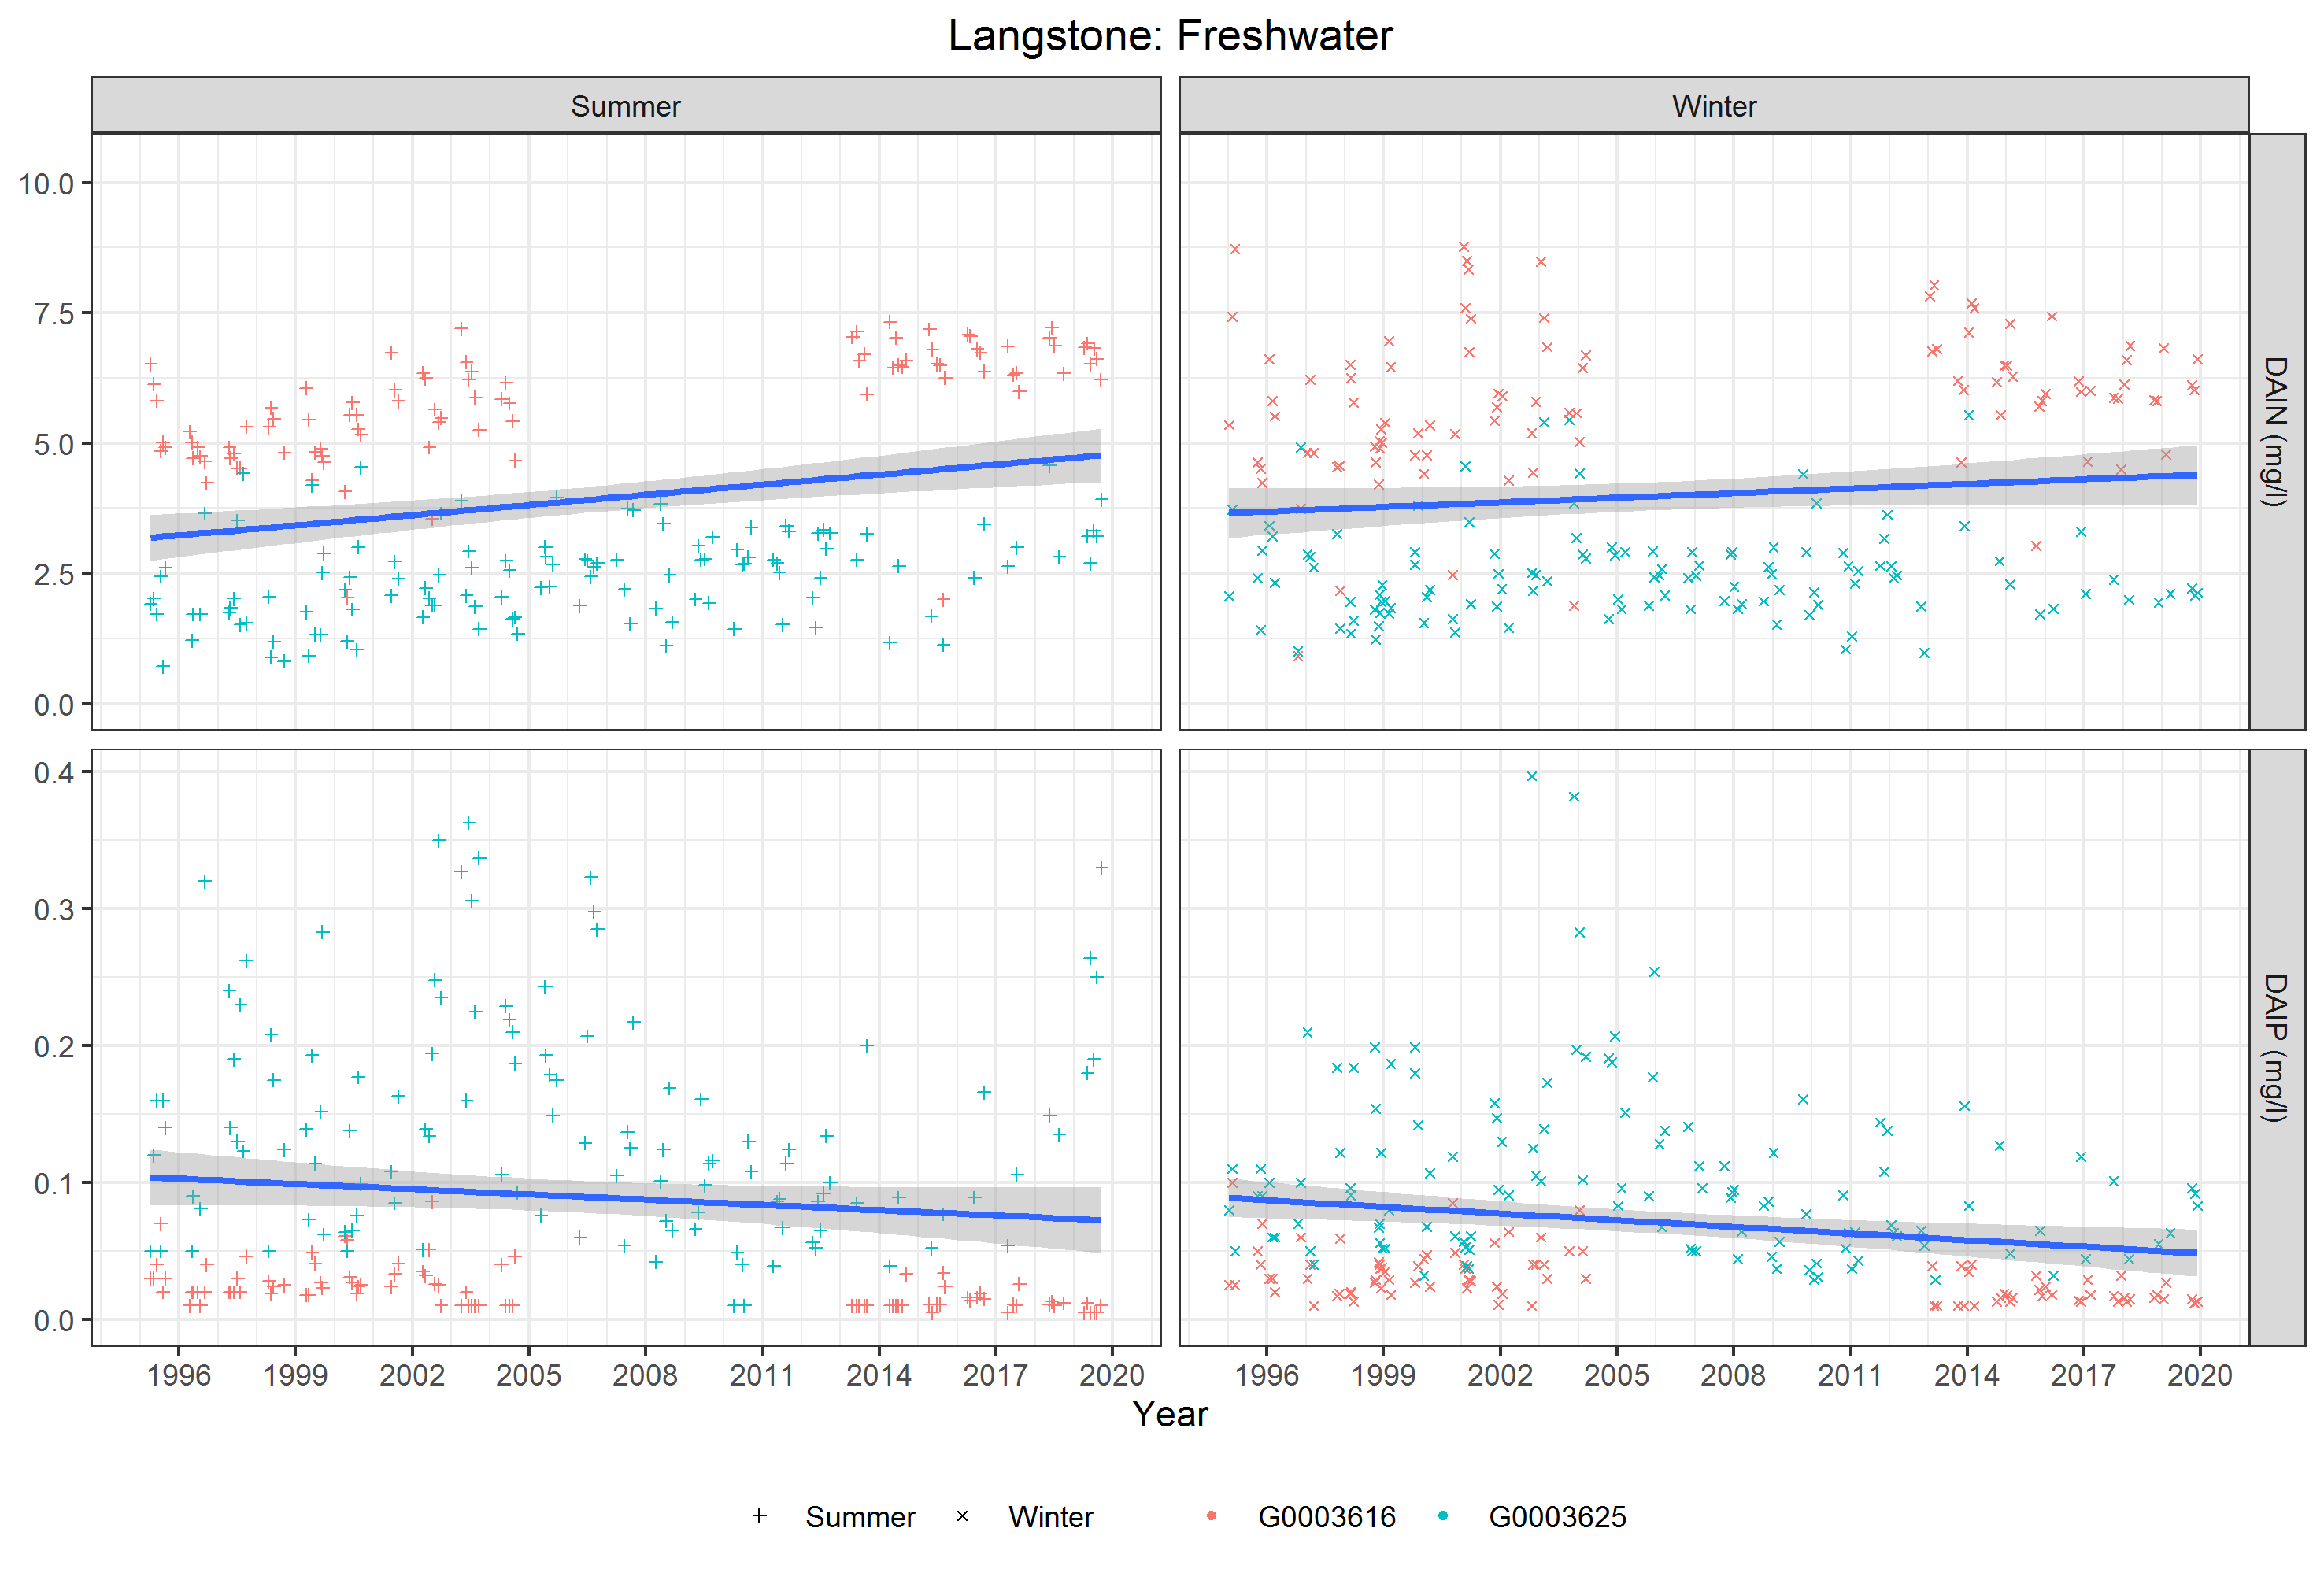
</div>

In [21]:
plot_params_buddsfarm = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_buddsfarm = {'c':'#EE6A50', 'marker':'+', 's':35, 'alpha':0.85}


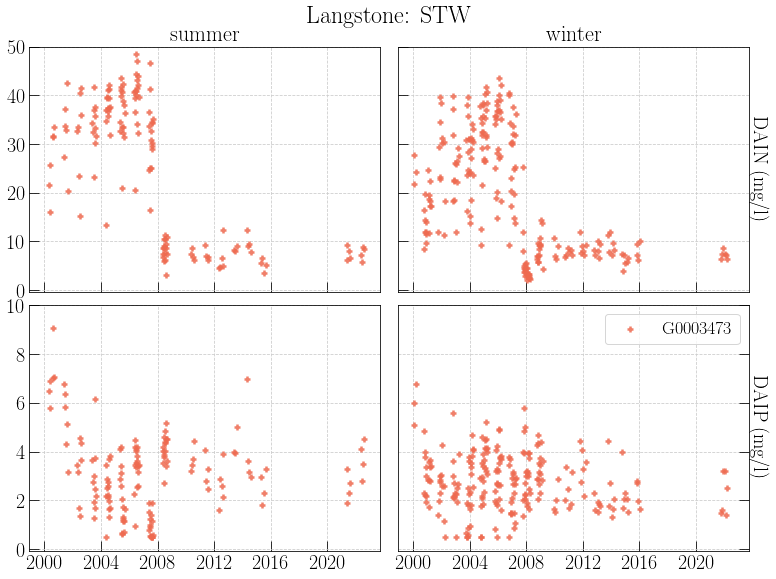

In [31]:
fig, axes = plt.subplots(nrows=2,ncols=2, sharey='row', sharex=True, figsize=(10,7))
#fig.subplots_adjust(hspace=0.)

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)




wqf.DAIN_summer(df_langstone_buddsfarm, "", location_type="notation", plt_kwargs_s=plot_params_buddsfarm,\
        sct_kwargs_s=scatter_params_buddsfarm, ax=axes[0, 0], plot_title="summer")


wqf.DAIN_winter(df_langstone_buddsfarm,"", location_type="notation", plt_kwargs_w=plot_params_buddsfarm,\
                sct_kwargs_w=scatter_params_buddsfarm,ax=axes[0, 1], plot_title="winter")

axes[0, 1].yaxis.set_label_position("right")

axes[0, 1].set_ylabel("DAIN (mg/l)", rotation=270, labelpad=20)

axes[0, 1].set_ylim([-.5, 50])
axes[0, 0].set_ylim([-.5, 50])



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_buddsfarm, "", 180, ax=axes[1, 0], location_type="notation", plt_kwargs_s=plot_params_buddsfarm, sct_kwargs_s=scatter_params_buddsfarm);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_buddsfarm, "", 180, ax=axes[1, 1], location_type="notation", plt_kwargs_w=plot_params_buddsfarm, sct_kwargs_w=scatter_params_buddsfarm, label_str="G0003473");
axes[1, 1].yaxis.tick_right()

axes[1, 1].yaxis.set_label_position("right")

axes[1, 1].set_ylabel("DAIP (mg/l)", rotation=270, labelpad=20)


axes[0, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 0].set_ylim([-.05, 10])
axes[1, 1].set_ylim([-.05, 10])

fig.suptitle(x=0.5, y=1.08, t="Langstone: STW", fontsize=24);

### Figure 4 in report:

<div>
   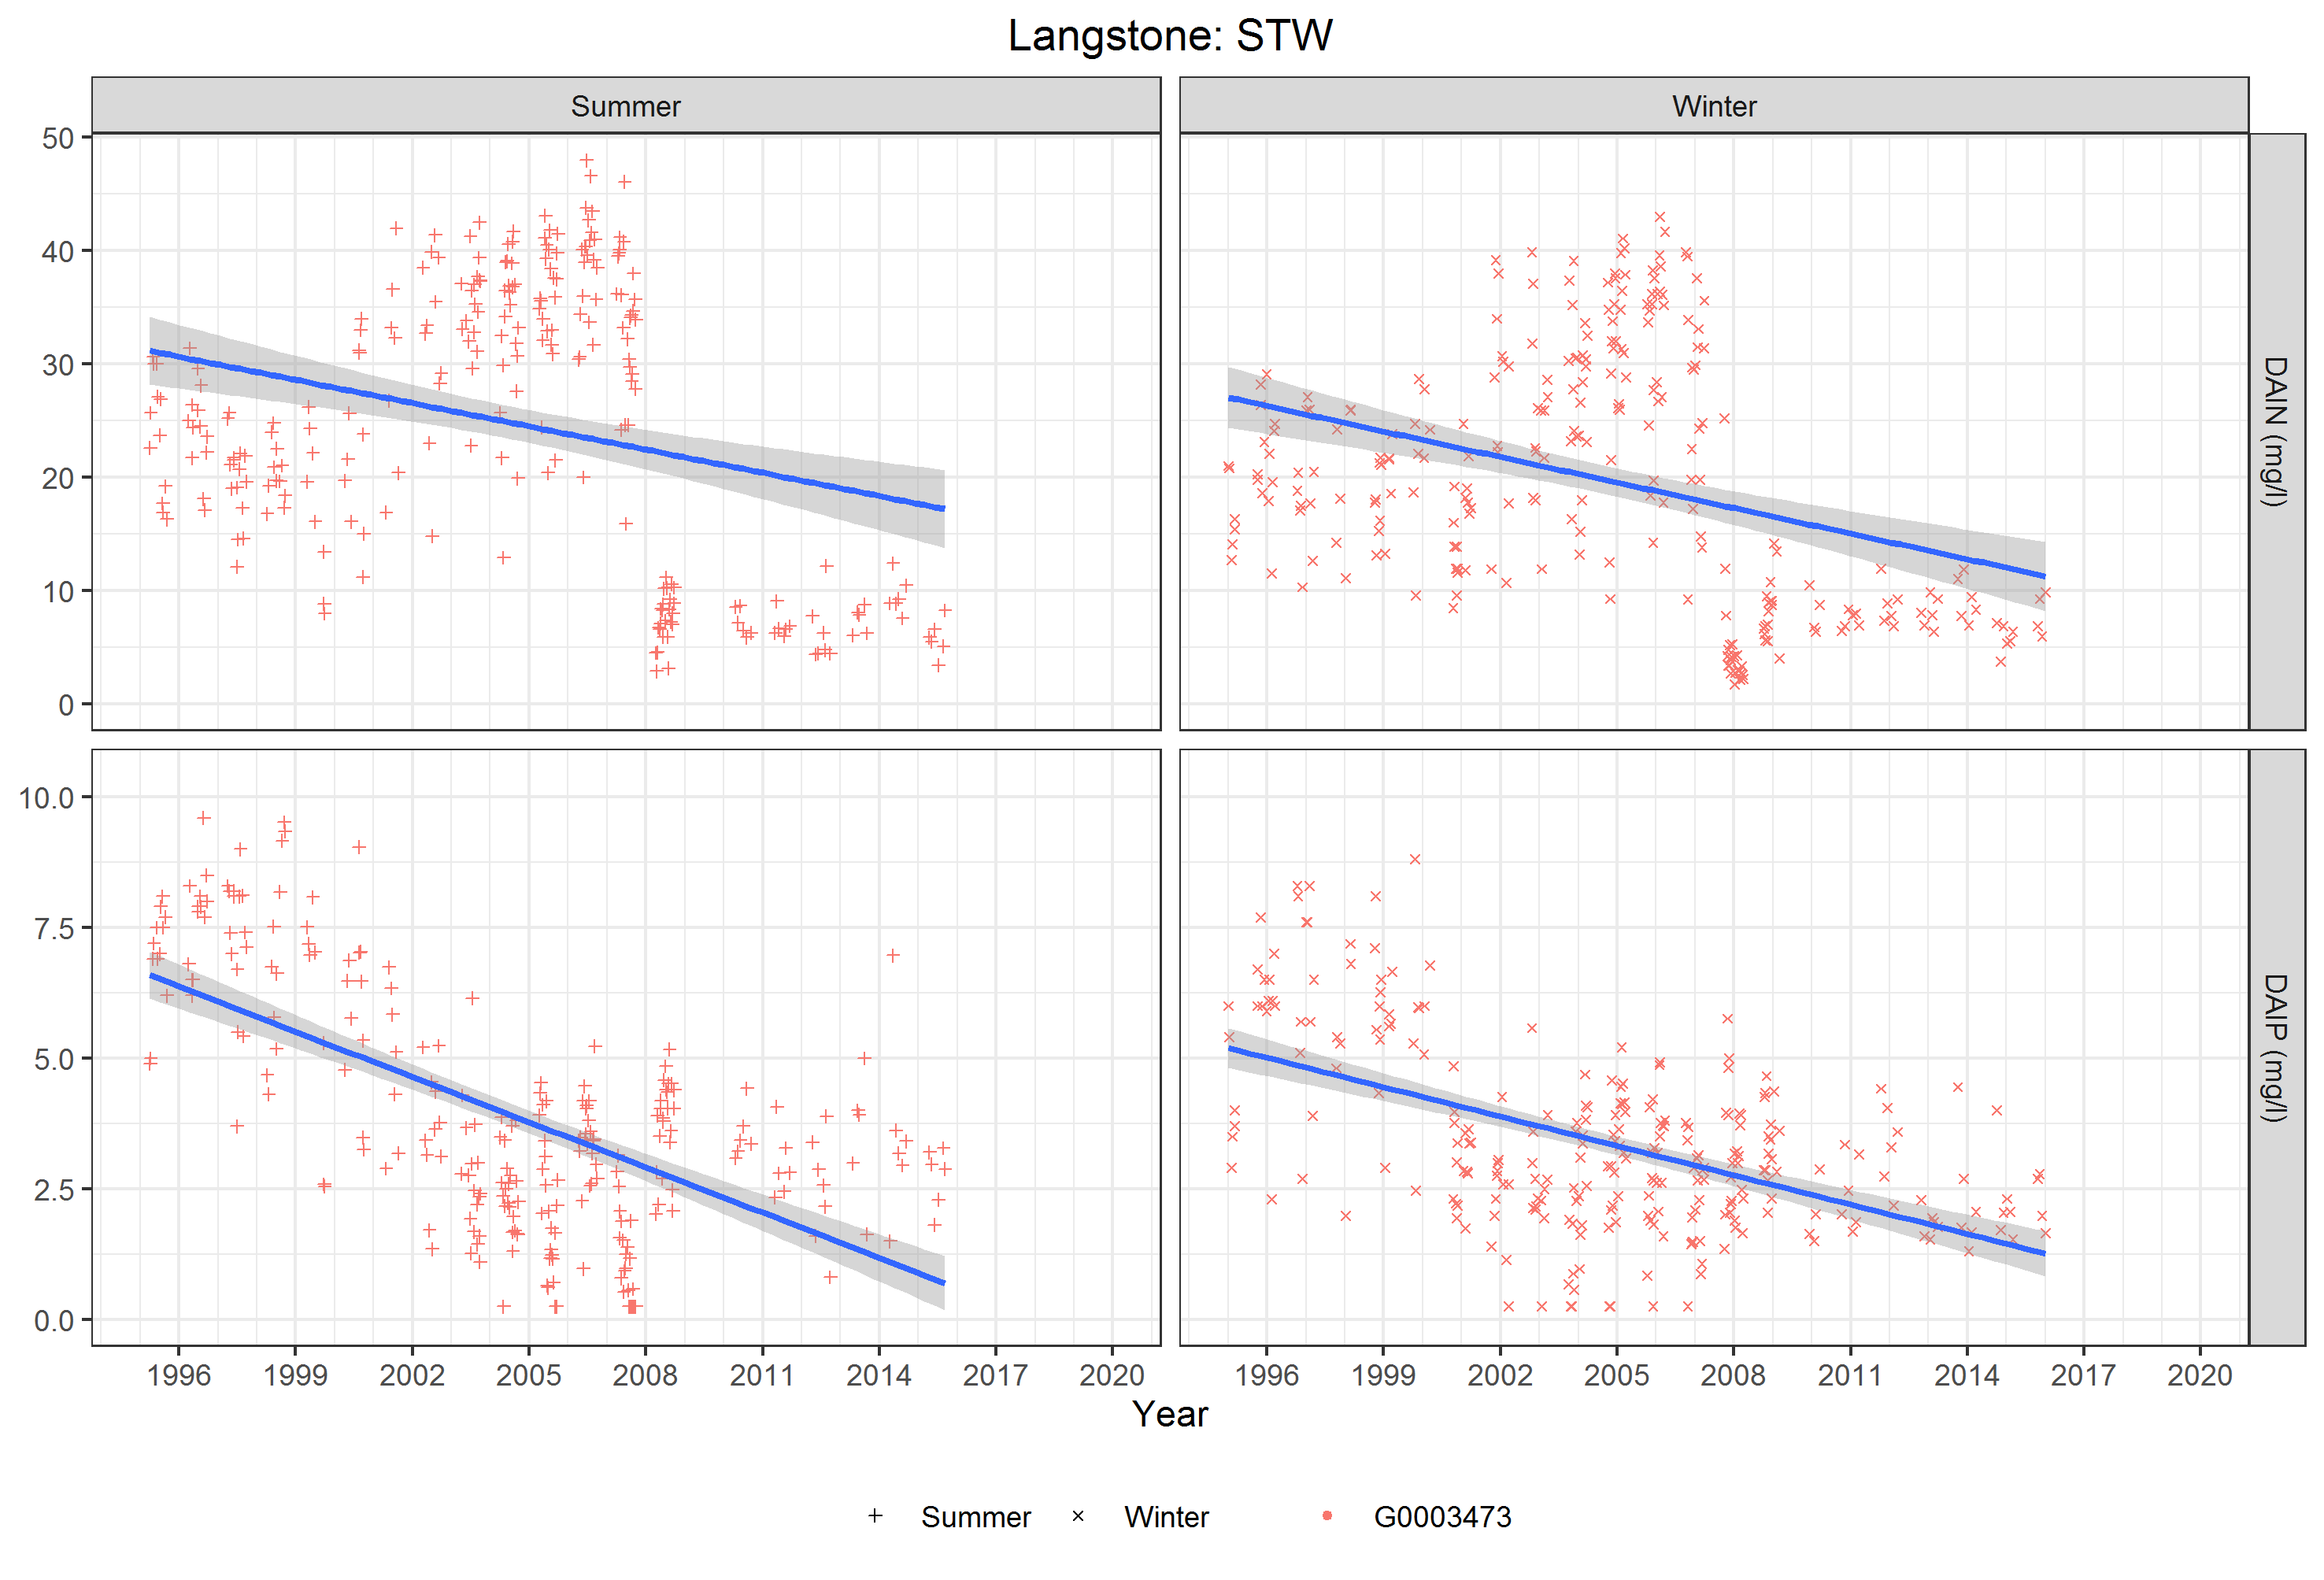
</div>

### Figure 5 in report:



<div>
   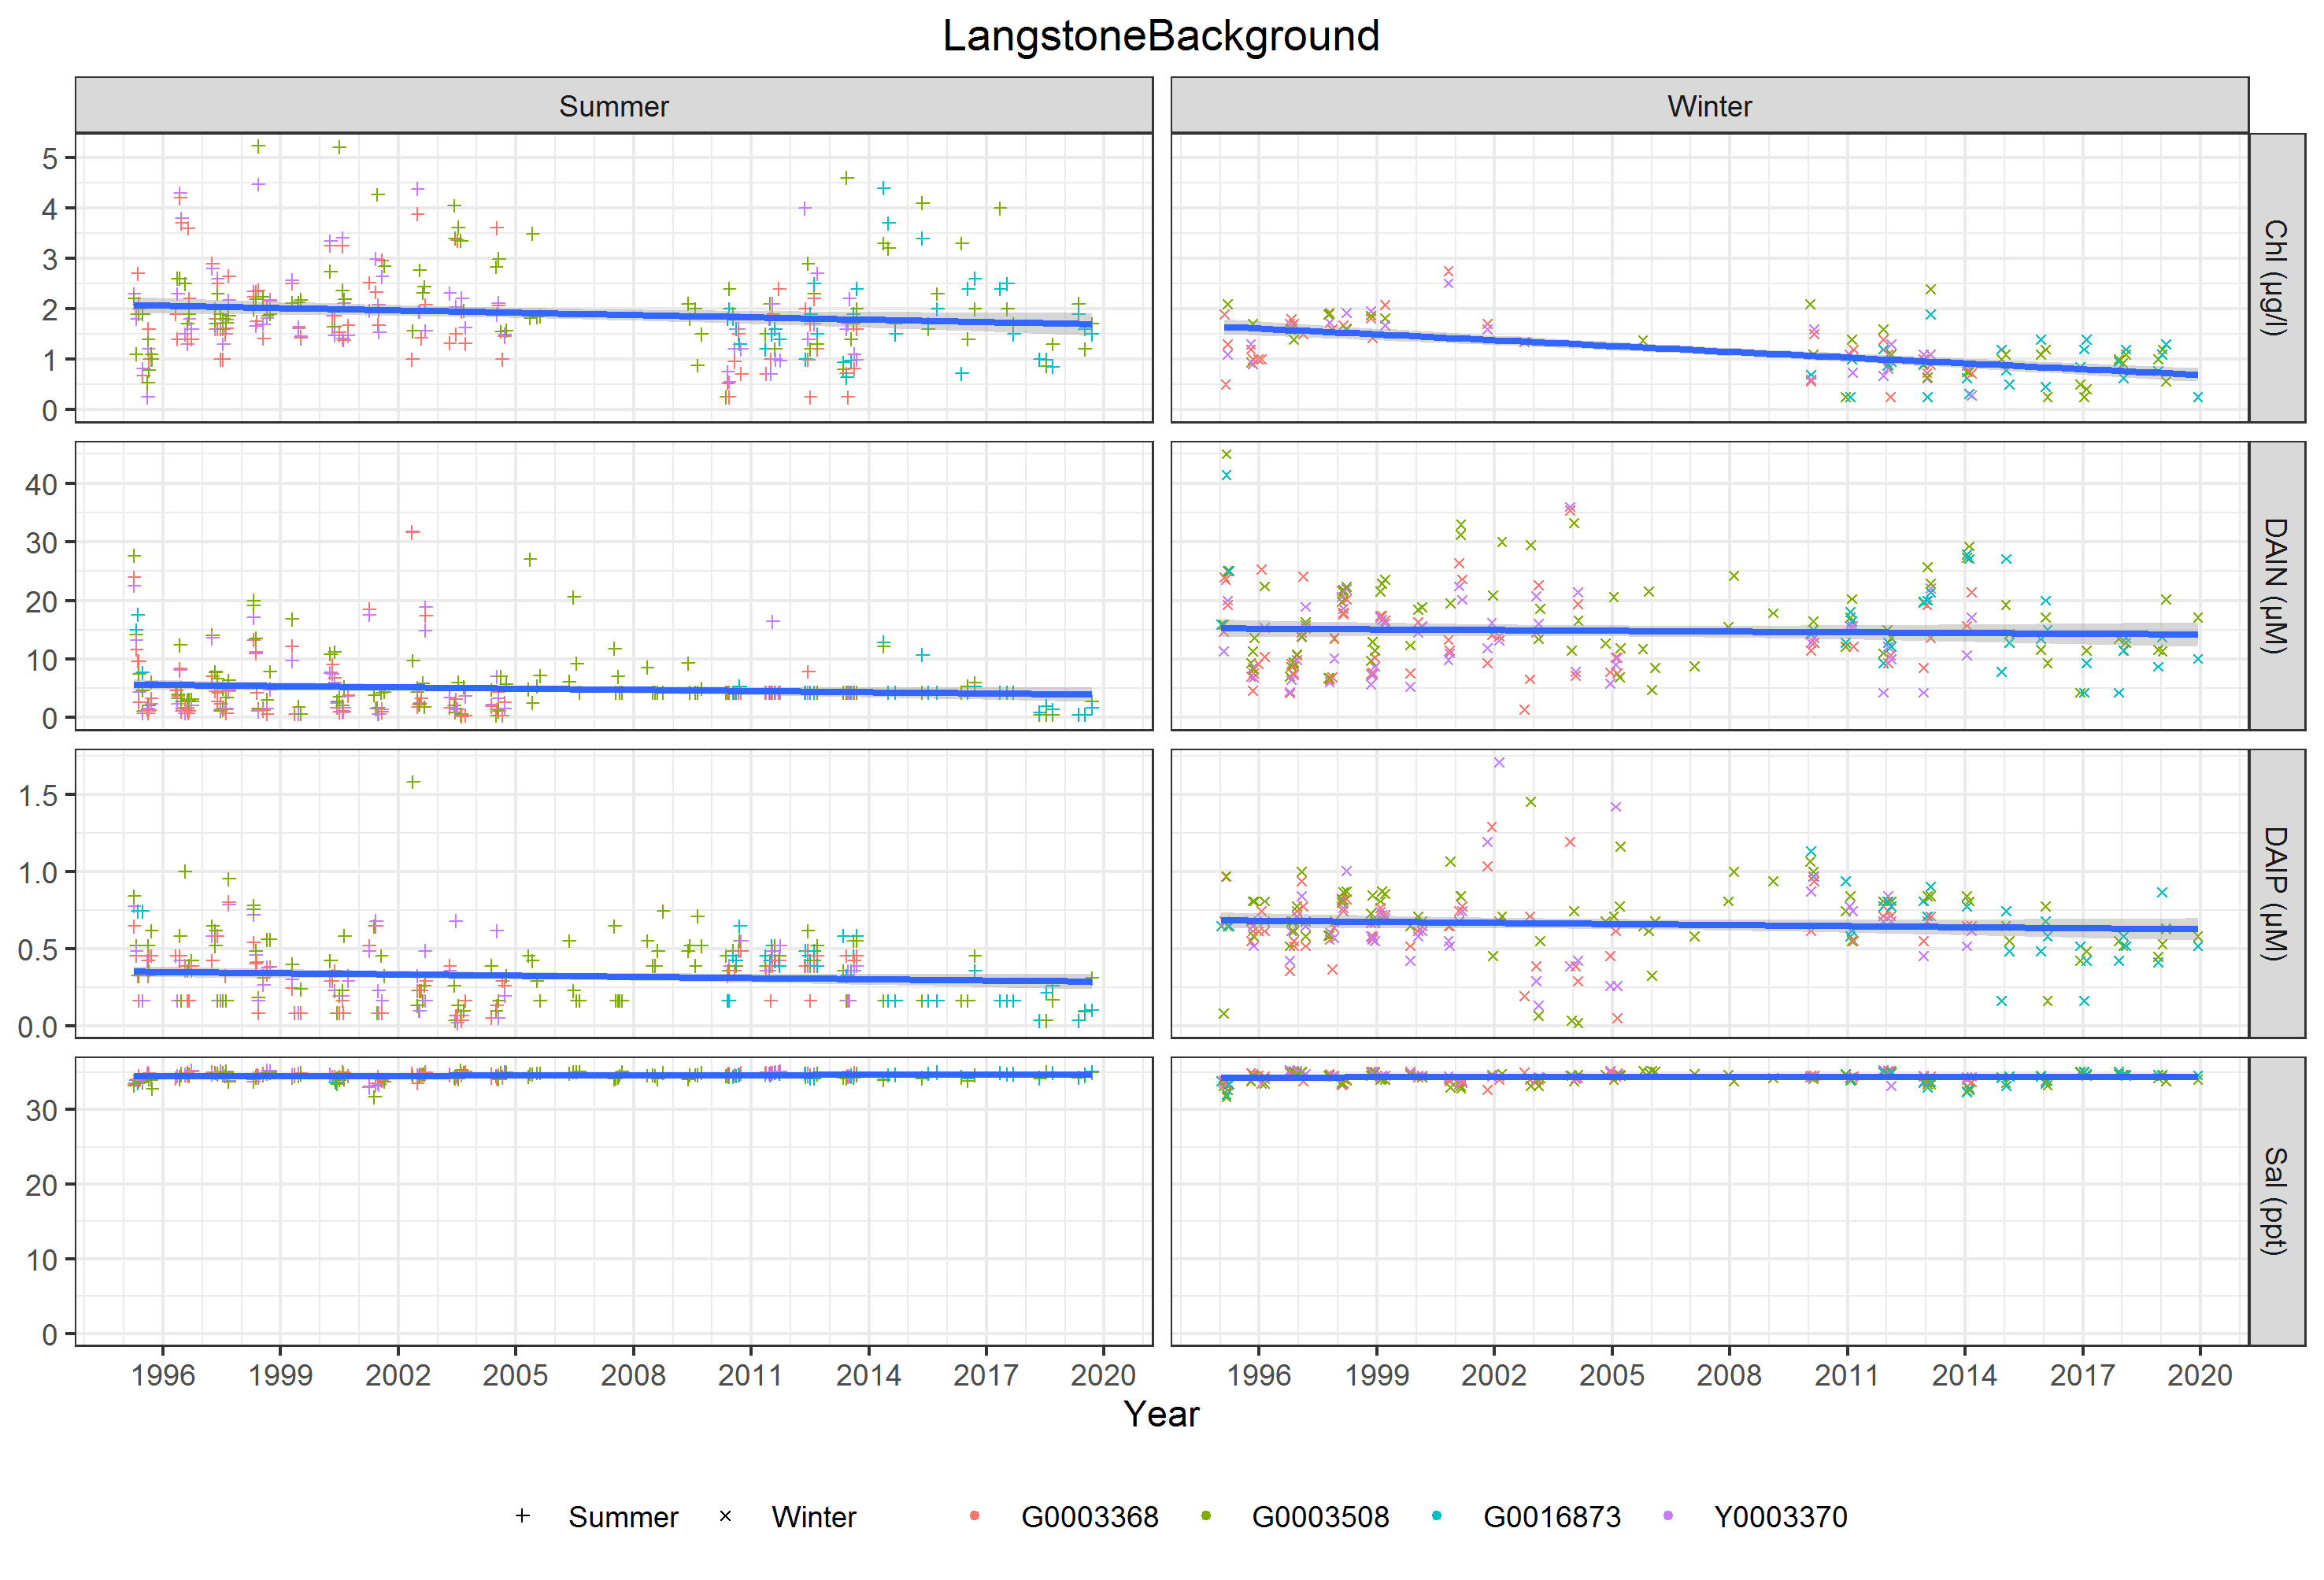
</div>

In [23]:
plot_params_G0003368 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_G0003368 = {'c':'#EE6A50', 'marker':'o', 's':35, 'alpha':0.85}



plot_params_G0003508 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_G0003508 = {'c':'#A2CD5A', 'marker':'o', 's':35, 'alpha':0.85}

In [24]:
plot_params_G0016873 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_G0016873 = {'c':'#8DEEEE', 'marker':'o', 's':35, 'alpha':0.85}

In [25]:
plot_params_Y0003370 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_Y0003370 = {'c':'#8B3A62', 'marker':'o', 's':35, 'alpha':0.85}

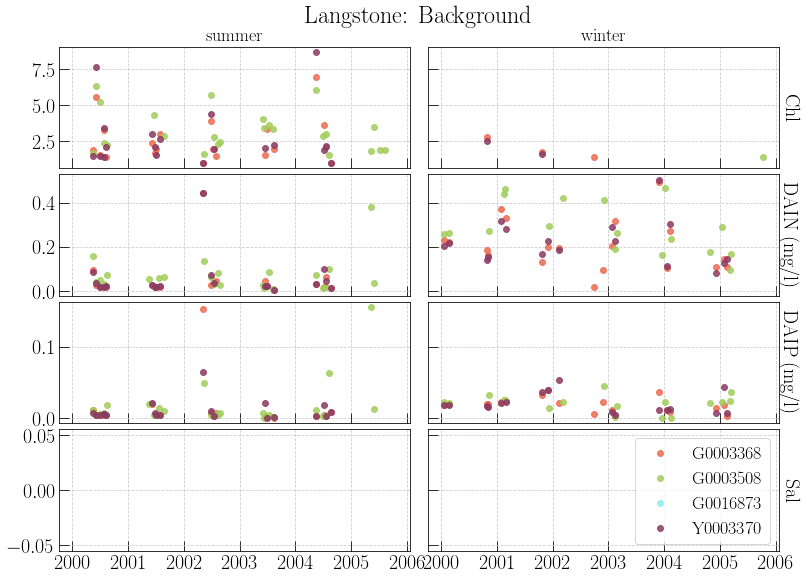

In [27]:
fig, axes = plt.subplots(nrows=4,ncols=2, sharey='row', sharex=True, figsize=(10,7))
#fig.subplots_adjust(hspace=0.)

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)


wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003368, "", 947, ax=axes[0, 0], location_type="notation", plt_kwargs_s=plot_params_G0003368, sct_kwargs_s=scatter_params_G0003368, plot_title="summer");


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003368, "", 947, ax=axes[0, 1], location_type="notation", plt_kwargs_w=plot_params_G0003368, sct_kwargs_w=scatter_params_G0003368, plot_title="winter");


wqf.DAIN_summer(df_langstone_G0003368, "", location_type="notation", plt_kwargs_s=plot_params_G0003368,\
        sct_kwargs_s=scatter_params_G0003368, ax=axes[1, 0])


wqf.DAIN_winter(df_langstone_G0003368,"", location_type="notation", plt_kwargs_w=plot_params_G0003368,\
                sct_kwargs_w=scatter_params_G0003368,ax=axes[1, 1])



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003368, "", 180, ax=axes[2, 0], location_type="notation", plt_kwargs_s=plot_params_G0003368, sct_kwargs_s=scatter_params_G0003368);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003368, "", 180, ax=axes[2, 1], location_type="notation", plt_kwargs_w=plot_params_G0003368, sct_kwargs_w=scatter_params_G0003368);



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003368, "", 7609, ax=axes[3, 0], location_type="notation", plt_kwargs_s=plot_params_G0003368, sct_kwargs_s=scatter_params_G0003368);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003368, "", 7609, ax=axes[3, 1], location_type="notation", plt_kwargs_w=plot_params_G0003368, sct_kwargs_w=scatter_params_G0003368, label_str="G0003368");


######
wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003508, "", 947, ax=axes[0, 0], location_type="notation", plt_kwargs_s=plot_params_G0003508, sct_kwargs_s=scatter_params_G0003508, plot_title="summer");


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003508, "", 947, ax=axes[0, 1], location_type="notation", plt_kwargs_w=plot_params_G0003508, sct_kwargs_w=scatter_params_G0003508, plot_title="winter");


wqf.DAIN_summer(df_langstone_G0003508, "", location_type="notation", plt_kwargs_s=plot_params_G0003508,\
        sct_kwargs_s=scatter_params_G0003508, ax=axes[1, 0])


wqf.DAIN_winter(df_langstone_G0003508,"", location_type="notation", plt_kwargs_w=plot_params_G0003508,\
                sct_kwargs_w=scatter_params_G0003508,ax=axes[1, 1])



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003508, "", 180, ax=axes[2, 0], location_type="notation", plt_kwargs_s=plot_params_G0003508, sct_kwargs_s=scatter_params_G0003508);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003508, "", 180, ax=axes[2, 1], location_type="notation", plt_kwargs_w=plot_params_G0003508, sct_kwargs_w=scatter_params_G0003508);



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003508, "", 7609, ax=axes[3, 0], location_type="notation", plt_kwargs_s=plot_params_G0003508, sct_kwargs_s=scatter_params_G0003508);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003508, "", 7609, ax=axes[3, 1], location_type="notation", plt_kwargs_w=plot_params_G0003508, sct_kwargs_w=scatter_params_G0003508, label_str="G0003508");


######


wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0016873, "", 947, ax=axes[0, 0], location_type="notation", plt_kwargs_s=plot_params_G0016873, sct_kwargs_s=scatter_params_G0016873, plot_title="summer");


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0016873, "", 947, ax=axes[0, 1], location_type="notation", plt_kwargs_w=plot_params_G0016873, sct_kwargs_w=scatter_params_G0016873, plot_title="winter");


wqf.DAIN_summer(df_langstone_G0016873, "", location_type="notation", plt_kwargs_s=plot_params_G0016873,\
        sct_kwargs_s=scatter_params_G0016873, ax=axes[1, 0])


wqf.DAIN_winter(df_langstone_G0016873,"", location_type="notation", plt_kwargs_w=plot_params_G0016873,\
                sct_kwargs_w=scatter_params_G0016873,ax=axes[1, 1])



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0016873, "", 180, ax=axes[2, 0], location_type="notation", plt_kwargs_s=plot_params_G0016873, sct_kwargs_s=scatter_params_G0016873);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0016873, "", 180, ax=axes[2, 1], location_type="notation", plt_kwargs_w=plot_params_G0016873, sct_kwargs_w=scatter_params_G0016873);



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_G0016873, "", 7609, ax=axes[3, 0], location_type="notation", plt_kwargs_s=plot_params_G0016873, sct_kwargs_s=scatter_params_G0016873);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_G0016873, "", 7609, ax=axes[3, 1], location_type="notation", plt_kwargs_w=plot_params_G0016873, sct_kwargs_w=scatter_params_G0016873, label_str="G0016873");


#########

wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_Y0003370, "", 947, ax=axes[0, 0], location_type="notation", plt_kwargs_s=plot_params_Y0003370, sct_kwargs_s=scatter_params_Y0003370, plot_title="summer");


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_Y0003370, "", 947, ax=axes[0, 1], location_type="notation", plt_kwargs_w=plot_params_Y0003370, sct_kwargs_w=scatter_params_Y0003370, plot_title="winter");


wqf.DAIN_summer(df_langstone_Y0003370, "", location_type="notation", plt_kwargs_s=plot_params_Y0003370,\
        sct_kwargs_s=scatter_params_Y0003370, ax=axes[1, 0])


wqf.DAIN_winter(df_langstone_Y0003370,"", location_type="notation", plt_kwargs_w=plot_params_Y0003370,\
                sct_kwargs_w=scatter_params_Y0003370,ax=axes[1, 1])



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_Y0003370, "", 180, ax=axes[2, 0], location_type="notation", plt_kwargs_s=plot_params_Y0003370, sct_kwargs_s=scatter_params_Y0003370);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_Y0003370, "", 180, ax=axes[2, 1], location_type="notation", plt_kwargs_w=plot_params_Y0003370, sct_kwargs_w=scatter_params_Y0003370);



wqf.plot_location_nutrientVStime_customizable_summer(df_langstone_Y0003370, "", 7609, ax=axes[3, 0], location_type="notation", plt_kwargs_s=plot_params_Y0003370, sct_kwargs_s=scatter_params_Y0003370);


wqf.plot_location_nutrientVStime_customizable_winter(df_langstone_Y0003370, "", 7609, ax=axes[3, 1], location_type="notation", plt_kwargs_w=plot_params_Y0003370, sct_kwargs_w=scatter_params_Y0003370, label_str="Y0003370");


#########




axes[0, 1].yaxis.set_label_position("right")
axes[1, 1].yaxis.set_label_position("right")
axes[2, 1].yaxis.set_label_position("right")
axes[3, 1].yaxis.set_label_position("right")


axes[0, 1].set_ylabel("Chl", rotation=270, labelpad=20)
axes[1, 1].set_ylabel("DAIN (mg/l)", rotation=270, labelpad=20)
axes[2, 1].set_ylabel("DAIP (mg/l)", rotation=270, labelpad=20)
axes[3, 1].set_ylabel("Sal", rotation=270, labelpad=20)




axes[0, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 1].grid(which='major', color='#CCCCCC', linestyle='--')

axes[2, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[2, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[3, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[3, 1].grid(which='major', color='#CCCCCC', linestyle='--')


fig.suptitle(x=0.5, y=1.08, t="Langstone: Background", fontsize=24);